In [6]:
!wget https://opendata.arcgis.com/datasets/3aa9f7b1428642998fa399c57dad8045_0.csv

--2020-09-01 17:36:57--  https://opendata.arcgis.com/datasets/3aa9f7b1428642998fa399c57dad8045_0.csv
Resolving opendata.arcgis.com (opendata.arcgis.com)... 34.196.73.37, 54.144.127.131, 34.202.76.40, ...
Connecting to opendata.arcgis.com (opendata.arcgis.com)|34.196.73.37|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘3aa9f7b1428642998fa399c57dad8045_0.csv’

3aa9f7b1428642998fa     [ <=>                ]  36.09K  --.-KB/s    in 0s      

2020-09-01 17:36:57 (312 MB/s) - ‘3aa9f7b1428642998fa399c57dad8045_0.csv’ saved [36955]



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mn

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
df = pd.read_csv('data.csv')

In [9]:
df.head()

,OBJECTID,HR_UID,Province,ENGNAME,FRENAME,CurrentCaseCount,CurrentDeaths,CurrentRecovered,CurrentTests,TotalPop2019,Pop0to4_2019,Pop5to9_2019,Pop10to14_2019,Pop15to19_2019,Pop20to24_2019,Pop25to29_2019,Pop30to34_2019,Pop35to39_2019,Pop40to44_2019,Pop45to49_2019,Pop50to54_2019,Pop55to59_2019,Pop60to64_2019,Pop65to69_2019,Pop70to74_2019,Pop75to79_2019,Pop80to84_2019,Pop85Older,AverageAge_2019,MedianAge_2019,Last_Updated,SourceURL,GlobalID,CurrentCaseFreeDays,NewCaseRate100K7Day,SHAPE_Length,SHAPE_Area
0,1,3537,ON,City of Hamilton Health Unit,Circonscription sanitaire de la cité de Hamilton,988,45.0,870.0,73383.0,576272,29112,29657,30046,31372,39353,44925,41624,38470,35351,35401,38522,42483,38399,30989,25528,17609,12640,14790,41.40,40.50,2020/08/31 20:06:59,https://www.hamilton.ca/coronavirus/status-cases,{22BDD837-3F16-4228-9E49-2D871179E434},0.0,0.347058,1.830824,0.127329
1,2,3538,ON,Hastings and Prince Edward Counties Health Unit,Circonscription sanitaire des comtés de Hastin...,49,5.0,39.0,22768.0,144779,6581,6795,7268,7394,8067,8298,7544,7505,7513,8328,10364,12673,11905,10378,9289,6282,4381,4215,45.30,48.30,2020/08/31 20:06:59,https://hpepublichealth.ca/the-novel-coronavir...,{927CB540-8336-44E5-AD7D-74311D3BBEF7},5.0,0.098673,7.844390,0.842562
2,3,3539,ON,Huron Perth Public Health Unit,Circonscription sanitaire du comté de Huron Perth,120,5.0,76.0,12458.0,136672,7636,7775,8082,8098,8788,8484,7173,7154,7188,7566,8799,10700,9905,8893,7319,5369,3812,3933,42.75,43.95,2020/08/31 20:07:59,https://www.hpph.ca/en/health-matters/covid-19...,{258AF20D-FA4C-4004-AB8B-5256A5D591F7},0.0,0.522628,3.932228,0.625515
3,4,3540,ON,Chatham-Kent Health Unit,Circonscription sanitaire de Chatham-Kent,363,2.0,353.0,21874.0,105303,5260,5534,5959,6125,6308,6118,5640,5685,5408,6024,7071,8571,8304,7030,5993,4127,2990,3156,43.70,45.50,2020/08/31 20:07:59,https://ckphu.com/current-situation-in-chatham...,{71DC7C02-01C4-46E9-85EE-5DA356737504},0.0,0.406989,3.018443,0.278637
4,5,3541,ON,"Kingston, Frontenac and Lennox and Addington H...","Circonscription sanitaire de Kingston, Fronten...",112,0.0,109.0,46305.0,206768,9349,9361,9770,9830,12903,16470,14908,13325,12155,12150,13629,16176,14361,12710,11036,7795,5242,5596,43.30,43.10,2020/08/31 20:07:59,https://www.kflaph.ca/en/healthy-living/novel-...,{9A8EBB21-DFF0-4A7E-938C-271255569A50},6.0,0.000000,7.504309,0.816650


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   OBJECTID             92 non-null     int64  
 1   HR_UID               92 non-null     int64  
 2   Province             92 non-null     object 
 3   ENGNAME              92 non-null     object 
 4   FRENAME              92 non-null     object 
 5   CurrentCaseCount     92 non-null     int64  
 6   CurrentDeaths        83 non-null     float64
 7   CurrentRecovered     69 non-null     float64
 8   CurrentTests         57 non-null     float64
 9   TotalPop2019         92 non-null     int64  
 10  Pop0to4_2019         92 non-null     int64  
 11  Pop5to9_2019         92 non-null     int64  
 12  Pop10to14_2019       92 non-null     int64  
 13  Pop15to19_2019       92 non-null     int64  
 14  Pop20to24_2019       92 non-null     int64  
 15  Pop25to29_2019       92 non-null     int64

In [11]:
df.isna().mean() * 100

OBJECTID                0.000000
HR_UID                  0.000000
Province                0.000000
ENGNAME                 0.000000
FRENAME                 0.000000
CurrentCaseCount        0.000000
CurrentDeaths           9.782609
CurrentRecovered       25.000000
CurrentTests           38.043478
TotalPop2019            0.000000
Pop0to4_2019            0.000000
Pop5to9_2019            0.000000
Pop10to14_2019          0.000000
Pop15to19_2019          0.000000
Pop20to24_2019          0.000000
Pop25to29_2019          0.000000
Pop30to34_2019          0.000000
Pop35to39_2019          0.000000
Pop40to44_2019          0.000000
Pop45to49_2019          0.000000
Pop50to54_2019          0.000000
Pop55to59_2019          0.000000
Pop60to64_2019          0.000000
Pop65to69_2019          0.000000
Pop70to74_2019          0.000000
Pop75to79_2019          0.000000
Pop80to84_2019          0.000000
Pop85Older              0.000000
AverageAge_2019         0.000000
MedianAge_2019          0.000000
Last_Updat

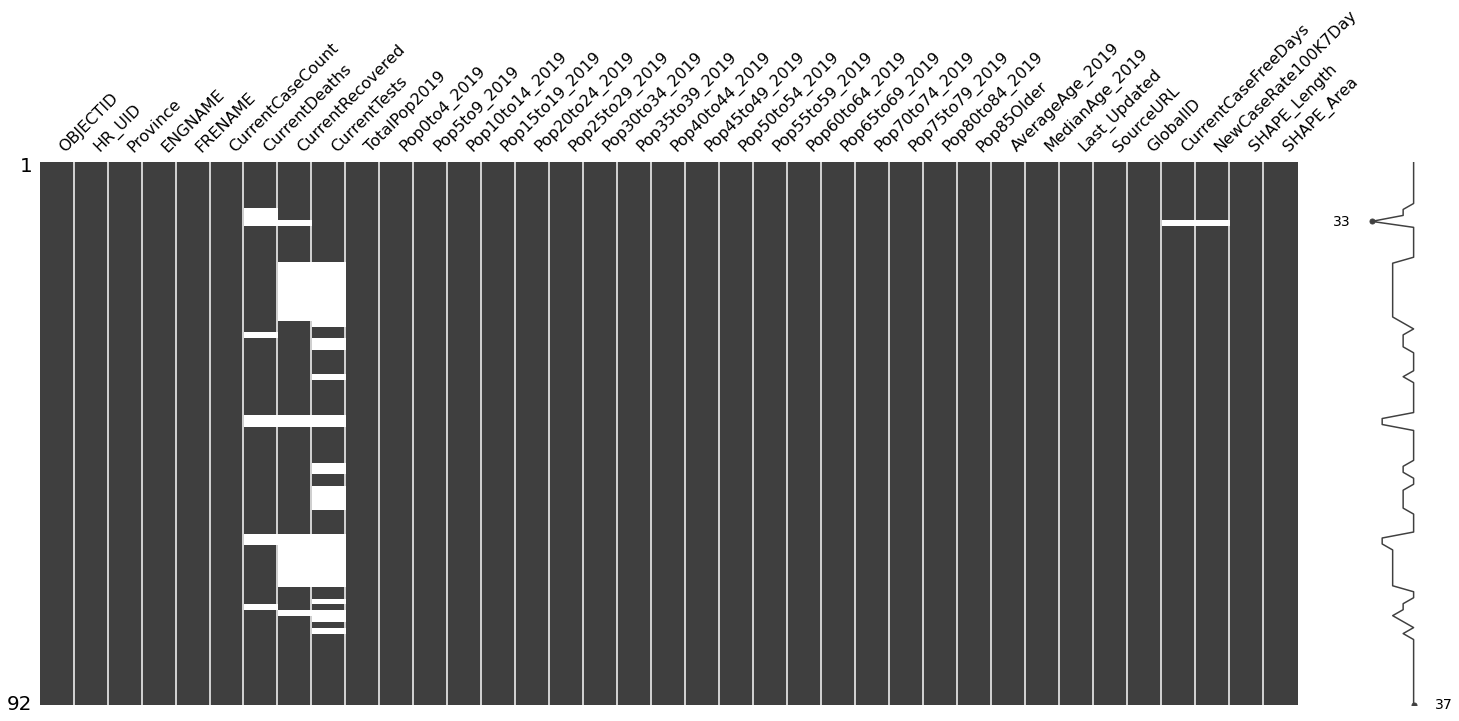

In [12]:
mn.matrix(df)

In [13]:
df.Province.value_counts()

ON    34
QC    18
NB     7
SK     6
BC     5
MB     5
AB     5
NS     4
NL     4
NU     1
NT     1
YT     1
PE     1
Name: Province, dtype: int64

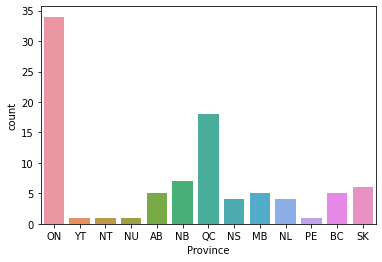

In [20]:
sns.countplot(df.Province)

In [ ]:
#Hide
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mn

In [3]:
#Hide
#Open Table dataset
df = pd.read_csv('YoY_Seated_Diner_Data_Country.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Columns: 198 entries, Type to 8/31
dtypes: float64(165), int64(31), object(2)
memory usage: 162.5+ KB


In [4]:
#Hide
#Data Wrangling 

# Transpose
df1 = df.T

#Update header - use 'Name' values
new_header = df1.iloc[1]
df1 = df1.iloc[2:,:]
df1.columns = new_header

#Adding dates as a column
df1['Date'] = list(df1.index.values)

#Making Date first column
first_col = df1.pop('Date')
df1.insert(0, 'Date', first_col)

#Replacing index names
df1.index = [i for i in range(len(df1))]

#Converting dtypes into numeric
mask = df1.columns[1:].to_list()
for i in mask:
  df1[i] = df1[i].astype('float64')



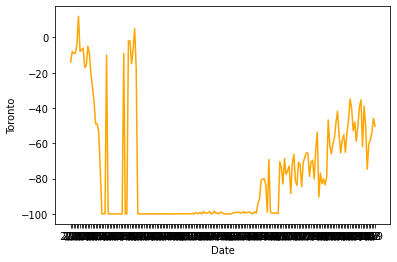

In [5]:
sns.lineplot(x = df1.Date , y=df1['Toronto'] , data = df1, color = 'orange')

In [6]:
# Countries - United States, Canada, Mexico
# Cities- US(Wisconsin, Atlanta, Austin, Baltimore, Denver, Honolulu, Houston, Indianapolis, Las Vegas, Los Angeles, Miami, San Diego, New York, Seattle)
#CA(Calgary, Montréal, Toronto, Vancouver ), MEX(Ciudad de México, Mexico City, San Pedro Garza García)

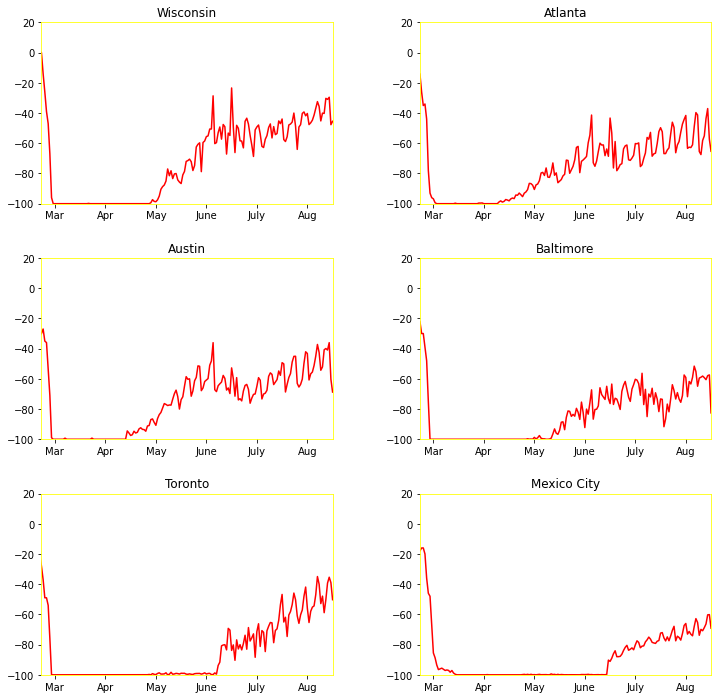

In [59]:
fig, axs = plt.subplots(3,2, figsize = (12,12))
x = df1.Date
cities = ['Wisconsin', 'Atlanta', 'Austin', 'Baltimore', 'Toronto', 'Mexico City']
city_code = 0
for i in range(3):
  for j in range(2):
    axs[i,j].plot(x, df1[cities[city_code]], color = 'red')
    axs[i,j].set(title = cities[city_code], xlim = ['3/11','8/31'], ylim = [-100,20])
    for spine in axs[i,j].spines.values():
        spine.set_edgecolor('yellow')
    axs[i,j].xaxis.set_major_locator(plt.MaxNLocator(6)) 
    axs[i,j].set_xticklabels(['','Mar','Apr', 'May', 'June', 'July', 'Aug'])
    city_code += 1

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=.3)